In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta

# List of products and categories
products = ['Tomatoes', 'Lemons', 'Cucumbers', 'Milk', 'Cheese', 'Chicken', 'Bread', 'Carrots']
categories = ['Fruit', 'Vegetables', 'Dairy', 'Meat', 'Bakery']

# Function to generate random data
def generate_fake_data(num_rows):
    data = []
    for _ in range(num_rows):
        product = random.choice(products)
        category = random.choice(categories)
        price = round(random.uniform(0.5, 20), 2)
        weight = random.choice([100, 250, 500, 1000])  # in grams
        available = random.randint(1, 200)
        expiresAt = datetime.now() + timedelta(days=random.randint(1, 365))
        data.append([product, category, price, f"{weight}g", available, expiresAt])
    return pd.DataFrame(data, columns=['Product', 'Category', 'Price', 'Weight', 'Available', 'ExpiresAt'])

# Generate 1000 rows of fake data
fake_data = generate_fake_data(1000)
print(fake_data.head())
# Save the fake data as a CSV file
fake_data.to_csv('fake_data.csv', index=False)

     Product    Category  Price Weight  Available                  ExpiresAt
0      Bread       Fruit   3.64   100g        132 2025-08-31 22:54:00.649823
1  Cucumbers        Meat   8.54   500g        136 2025-06-29 22:54:00.649823
2   Tomatoes       Fruit  19.24  1000g         32 2025-06-14 22:54:00.649823
3    Carrots       Dairy   0.91   100g         99 2024-12-26 22:54:00.649823
4  Cucumbers  Vegetables   0.65  1000g         91 2024-10-17 22:54:00.649823


In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta
import json

# List of products with pre-defined IDs, names, weights, and packaging units
products = [
    {"id": "8376291", "name": "Organic Cherry Tomatoes", "weight": "250g", "packagingUnit": "punnet"},
    {"id": "5728364", "name": "Sweet Potatoes", "weight": "1kg", "packagingUnit": "bag"},
    {"id": "9126483", "name": "Broccoli Florets", "weight": "400g", "packagingUnit": "bag"},
    {"id": "4537281", "name": "Red Bell Peppers", "weight": "500g", "packagingUnit": "each"},
    {"id": "1928374", "name": "Baby Spinach", "weight": "150g", "packagingUnit": "bag"},
    {"id": "6273849", "name": "White Onions", "weight": "1kg", "packagingUnit": "bag"},
    {"id": "3847295", "name": "Carrots", "weight": "1kg", "packagingUnit": "bag"},
    {"id": "7129384", "name": "Garlic Bulb", "weight": "100g", "packagingUnit": "each"},
    {"id": "2938475", "name": "Green Zucchini", "weight": "500g", "packagingUnit": "each"},
    {"id": "8472931", "name": "Asparagus", "weight": "250g", "packagingUnit": "bunch"},
    # Add more products as needed
]

# Function to generate random data
def generate_fake_data(num_rows):
    data = []
    for _ in range(num_rows):
        product = random.choice(products)
        price = round(random.uniform(0.5, 20), 2)
        available = random.randint(1, 200)
        expiresAt = (datetime.now() + timedelta(days=random.randint(1, 365))).strftime('%Y-%m-%d')
        
        # Create dictionary for each product in the desired format
        item = {
            "id": product['id'],
            "name": product['name'],
            "expiresAt": expiresAt,
            "price": price,
            "weight": product['weight'],
            "packagingUnit": product['packagingUnit'],
            "available": available
        }
        data.append(item)
    return data

# Generate 100 rows of fake data
fake_data = generate_fake_data(1000)

# Save the data as a JSON file
with open('fake_data.json', 'w') as f:
    json.dump(fake_data, f, indent=4)

print("Data saved to 'fake_data.json'")


Data saved to 'fake_data.json'


In [ ]:
import os
print(os.listdir('.'))


['app', 'env_name', 'fake_data.csv', 'fake_data.json', 'node_modules', 'package-lock.json', 'package.json']


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime



In [ ]:
# Load the JSON file into a pandas DataFrame
file_path = 'fake_data.json'  # Adjust the path if needed
fake_data = pd.read_json(file_path)

# View the first few rows of the dataset
fake_data.head()


,id,name,expiresAt,price,weight,packagingUnit,available
0,8376291,Organic Cherry Tomatoes,2024-09-23,2.99,250g,punnet,48
1,5728364,Sweet Potatoes,2024-10-15,1.79,1kg,bag,23
2,9126483,Broccoli Florets,2024-09-18,2.49,400g,bag,17
3,4537281,Red Bell Peppers,2024-12-02,1.29,500g,each,62
4,1928374,Baby Spinach,2024-09-27,3.99,150g,bag,8


In [ ]:
# Convert 'expiresAt' to datetime format
fake_data['expiresAt'] = pd.to_datetime(fake_data['expiresAt'])

# Verify the conversion
print(fake_data.dtypes)


id                        int64
name                     object
expiresAt        datetime64[ns]
price                   float64
weight                   object
packagingUnit            object
available                 int64
dtype: object


In [ ]:
# Calculate 'days_until_expiry'
fake_data['days_until_expiry'] = (fake_data['expiresAt'] - datetime.now()).dt.days

# Check the updated DataFrame
fake_data[['name', 'expiresAt', 'days_until_expiry']].head()


,name,expiresAt,days_until_expiry
0,Organic Cherry Tomatoes,2024-09-23,16
1,Sweet Potatoes,2024-10-15,38
2,Broccoli Florets,2024-09-18,11
3,Red Bell Peppers,2024-12-02,86
4,Baby Spinach,2024-09-27,20


In [ ]:
# Check for missing values
print(fake_data.isnull().sum())

# If there are missing values, handle them (e.g., drop or fill with median/mean)
# fake_data = fake_data.dropna()  # Option 1: Drop missing rows
# fake_data['available'] = fake_data['available'].fillna(fake_data['available'].median())  # Option 2: Fill with median


id                   0
name                 0
expiresAt            0
price                0
weight               0
packagingUnit        0
available            0
days_until_expiry    0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'days_until_expiry'
sns.histplot(fake_data['days_until_expiry'], bins=30)
plt.title('Distribution of Days Until Expiry')
plt.xlabel('Days Until Expiry')
plt.ylabel('Frequency')
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
!pip install matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------ --------------------------------- 1.3/7.8 MB 6.1 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/7.8 MB 8.4 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.8 MB 7.3 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 6.4 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 7.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.6 MB/s eta 0:00:00


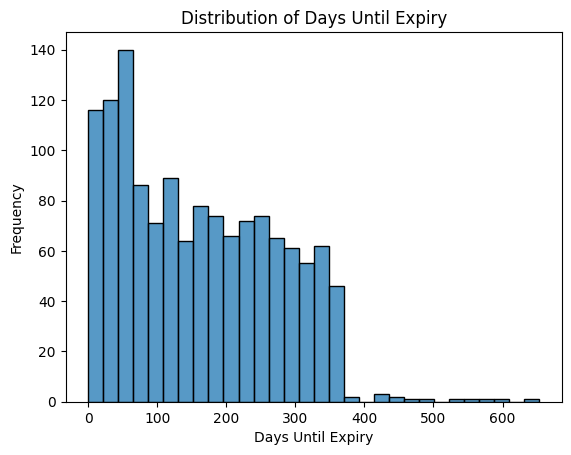

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'days_until_expiry'
sns.histplot(fake_data['days_until_expiry'], bins=30)
plt.title('Distribution of Days Until Expiry')
plt.xlabel('Days Until Expiry')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Apply one-hot encoding to 'name' and 'packagingUnit'
fake_data_encoded = pd.get_dummies(fake_data, columns=['name', 'packagingUnit'])

# Drop unnecessary columns ('id' since it doesn't contribute to the prediction)
fake_data_encoded = fake_data_encoded.drop(columns=['id', 'weight', 'expiresAt'])

# Display the first few rows of the encoded data
fake_data_encoded.head()


,price,available,days_until_expiry,"name_Adzuki Beans, Organic, 500g","name_Almond Milk, Unsweetened",name_Almonds Sliced Blanched 200g,name_Apple Pie Spice,name_Applewood Smoked Bacon,name_Apricots,name_Arugula,...,packagingUnit_can,packagingUnit_each,packagingUnit_grinder,packagingUnit_jar,packagingUnit_kg,packagingUnit_pack,packagingUnit_pcs,packagingUnit_piece,packagingUnit_pouch,packagingUnit_punnet
0,2.99,48,16,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1.79,23,38,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.49,17,11,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.29,62,86,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,3.99,8,20,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Define the features (X) and target (y)
X = fake_data_encoded.drop(columns=['days_until_expiry'])
y = fake_data_encoded['days_until_expiry']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")


Training set shape: (1082, 383), Test set shape: (271, 383)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 11996.628403690038
R² Score: 0.07897210516678688


In [ ]:
import pandas as pd

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)


                     Feature  Importance
0                      price    0.316876
1                  available    0.300256
373        packagingUnit_can    0.063969
15         name_Baby Spinach    0.025284
145         name_Garlic Bulb    0.016564
..                       ...         ...
171       name_Ground Nutmeg    0.000000
170  name_Ground Lamb (Lean)    0.000000
10     name_Asparagus Spears    0.000000
160        name_Green Apples    0.000000
152    name_Golden Pineapple    0.000000

[383 rows x 2 columns]


In [ ]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 11.2 MB/s eta 0:00:12
   - -------------------------------------- 4.2/124.9 MB 12.6 MB/s eta 0:00:10
   -- ------------------------------------- 7.3/124.9 MB 13.7 MB/s eta 0:00:09
   --- ------------------------------------ 10.5/124.9 MB 13.6 MB/s eta 0:00:09
   ---- ----------------------------------- 13.6/124.9 MB 14.0 MB/s eta 0:00:08
   ----- ---------------------------------- 16.5/124.9 MB 14.2 MB/s eta 0:00:08
   ----- ---------------------------------- 17.8/124.9 MB 12.9 MB/s eta 0:00:09
   ------ --------------------------------- 19.1/124.9 MB 12.2 MB/s eta 0:00:09
   ------ --------------------------------- 20.4/124.9 MB 11.5 MB/s eta 0:00:10
   ------ --------------------------------- 21.2/124.9 MB 10.9 MB/s eta 0:00:10
   ------- -------------------------------- 22.8/124.9

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the performance of the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print evaluation metrics
print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost R² Score: {r2_xgb}")


XGBoost Mean Squared Error (MSE): 12454.20591918511
XGBoost R² Score: 0.04384201765060425


In [ ]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 10.8 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train LightGBM Regressor
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the performance of the LightGBM model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Print evaluation metrics
print(f"LightGBM Mean Squared Error (MSE): {mse_lgb}")
print(f"LightGBM R² Score: {r2_lgb}")


LightGBMError: Do not support special JSON characters in feature name.

In [ ]:
# Clean the feature names to remove special characters (spaces, parentheses, etc.)
X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

# Verify the cleaned feature names
print(X_train.columns)


Index(['price', 'available', 'name_Adzuki_Beans_Organic_500g',
       'name_Almond_Milk_Unsweetened', 'name_Almonds_Sliced_Blanched_200g',
       'name_Apple_Pie_Spice', 'name_Applewood_Smoked_Bacon', 'name_Apricots',
       'name_Arugula', 'name_Asparagus',
       ...
       'packagingUnit_can', 'packagingUnit_each', 'packagingUnit_grinder',
       'packagingUnit_jar', 'packagingUnit_kg', 'packagingUnit_pack',
       'packagingUnit_pcs', 'packagingUnit_piece', 'packagingUnit_pouch',
       'packagingUnit_punnet'],
      dtype='object', length=383)


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train LightGBM Regressor with cleaned feature names
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the performance of the LightGBM model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Print evaluation metrics
print(f"LightGBM Mean Squared Error (MSE): {mse_lgb}")
print(f"LightGBM R² Score: {r2_lgb}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 457
[LightGBM] [Info] Number of data points in the train set: 1082, number of used features: 18
[LightGBM] [Info] Start training from score 161.617375
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [ ]:
import numpy as np
from datetime import timedelta

# Assuming 'stock_date' is not available, we simulate it by generating random stock dates.
# Simulating a 'stock_date' column where products were stocked between 1 and 365 days ago.
fake_data['stock_date'] = fake_data['expiresAt'] - pd.to_timedelta(np.random.randint(1, 365, size=len(fake_data)), unit='D')

# Calculate 'days_in_stock' as the difference between today and the stock_date
fake_data['days_in_stock'] = (datetime.now() - fake_data['stock_date']).dt.days

# View the new feature
fake_data[['stock_date', 'days_in_stock']].head()


,stock_date,days_in_stock
0,2024-07-07,62
1,2023-11-18,294
2,2024-02-29,191
3,2023-12-17,265
4,2024-04-30,130


In [ ]:
# Add 'days_in_stock' to the feature set
X_train['days_in_stock'] = X_train.index.map(fake_data['days_in_stock'])
X_test['days_in_stock'] = X_test.index.map(fake_data['days_in_stock'])


# Ensure all columns are cleaned
X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model with the new feature
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 6004.680100738007
R² Score: 0.5389973177273295


In [ ]:
# Simulate a 'previous_price' by adding some random variation to the current price for illustration purposes
fake_data['previous_price'] = fake_data['price'] * (1 + np.random.uniform(-0.3, 0.3, size=len(fake_data)))

# Calculate the price change rate
fake_data['price_change_rate'] = (fake_data['price'] - fake_data['previous_price']) / fake_data['previous_price']

# View the new feature
fake_data[['price', 'previous_price', 'price_change_rate']].head()


,price,previous_price,price_change_rate
0,2.99,3.752882,-0.203279
1,1.79,1.511669,0.184122
2,2.49,2.252136,0.105617
3,1.29,1.530914,-0.157366
4,3.99,4.742587,-0.158687


In [ ]:
# Simulate an 'original_price' for comparison (could be from real data)
fake_data['original_price'] = fake_data['price'] * (1 + np.random.uniform(0.05, 0.3, size=len(fake_data)))

# Create the discount indicator (1 if discounted, 0 otherwise)
fake_data['is_discounted'] = np.where(fake_data['price'] < fake_data['original_price'], 1, 0)

# View the new feature
fake_data[['price', 'original_price', 'is_discounted']].head()


,price,original_price,is_discounted
0,2.99,3.812024,1
1,1.79,2.273526,1
2,2.49,3.049737,1
3,1.29,1.620149,1
4,3.99,4.931930,1


In [ ]:
# Add the new features to the training and test sets
X_train['price_change_rate'] = X_train.index.map(fake_data['price_change_rate'])
X_test['price_change_rate'] = X_test.index.map(fake_data['price_change_rate'])

X_train['is_discounted'] = X_train.index.map(fake_data['is_discounted'])
X_test['is_discounted'] = X_test.index.map(fake_data['is_discounted'])

# Ensure all columns are cleaned
X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor with new features
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model with the new features
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 6341.351321771218
R² Score: 0.513149756602258


In [ ]:
# Remove the price-related features from the feature set
X_train = X_train.drop(columns=['price_change_rate', 'is_discounted'])
X_test = X_test.drop(columns=['price_change_rate', 'is_discounted'])


In [ ]:
# Create the stock-price interaction feature
fake_data['stock_price_interaction'] = fake_data['available'] * fake_data['price']

# Add the feature to the training and test sets
X_train['stock_price_interaction'] = X_train.index.map(fake_data['stock_price_interaction'])
X_test['stock_price_interaction'] = X_test.index.map(fake_data['stock_price_interaction'])

# Verify the new feature
fake_data[['available', 'price', 'stock_price_interaction']].head()


,available,price,stock_price_interaction
0,48,2.99,143.52
1,23,1.79,41.17
2,17,2.49,42.33
3,62,1.29,79.98
4,8,3.99,31.92


In [ ]:
# Create stock-category interaction (assuming 'category_encoded' exists)
fake_data['stock_category_interaction'] = fake_data['available'] * fake_data['category_encoded']

# Add the feature to the training and test sets
X_train['stock_category_interaction'] = X_train.index.map(fake_data['stock_category_interaction'])
X_test['stock_category_interaction'] = X_test.index.map(fake_data['stock_category_interaction'])

# Verify the new feature
fake_data[['available', 'category_encoded', 'stock_category_interaction']].head()


KeyError: 'category_encoded'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Check if the 'category' column exists
if 'category' in fake_data.columns:
    # Initialize LabelEncoder
    le = LabelEncoder()
    
    # Apply label encoding to the 'category' column
    fake_data['category_encoded'] = le.fit_transform(fake_data['category'])
else:
    print("Category column not found")


Category column not found


In [ ]:
# Apply one-hot encoding to the 'category' column
if 'category' in fake_data.columns:
    fake_data = pd.get_dummies(fake_data, columns=['category'], prefix='category')
else:
    print("Category column not found")


Category column not found


In [ ]:
# Check the columns in the dataset to identify potential categorical features
print(fake_data.columns)


Index(['id', 'name', 'expiresAt', 'price', 'weight', 'packagingUnit',
       'available', 'days_until_expiry', 'stock_date', 'days_in_stock',
       'previous_price', 'price_change_rate', 'original_price',
       'is_discounted', 'stock_price_interaction'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder and apply it to the 'name' column
le = LabelEncoder()
fake_data['name_encoded'] = le.fit_transform(fake_data['name'])

# Verify the encoding
fake_data[['name', 'name_encoded']].head()


,name,name_encoded
0,Organic Cherry Tomatoes,216
1,Sweet Potatoes,318
2,Broccoli Florets,40
3,Red Bell Peppers,270
4,Baby Spinach,13


In [ ]:
# Create stock-name interaction
fake_data['stock_name_interaction'] = fake_data['available'] * fake_data['name_encoded']

# Add the feature to the training and test sets
X_train['stock_name_interaction'] = X_train.index.map(fake_data['stock_name_interaction'])
X_test['stock_name_interaction'] = X_test.index.map(fake_data['stock_name_interaction'])

# Verify the new feature
fake_data[['available', 'name_encoded', 'stock_name_interaction']].head()


,available,name_encoded,stock_name_interaction
0,48,216,10368
1,23,318,7314
2,17,40,680
3,62,270,16740
4,8,13,104


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor with the new feature
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model with the new interaction feature
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 5914.375551291512
R² Score: 0.5459303497653131


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the model and the hyperparameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score (MSE): {-best_score}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Score (MSE): 5828.100772657129


In [ ]:
# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions using the test set
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the performance of the tuned model on the test data
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the results
print(f"Tuned Mean Squared Error (MSE): {mse_best}")
print(f"Tuned R² Score: {r2_best}")


Tuned Mean Squared Error (MSE): 5831.179581421852
Tuned R² Score: 0.5523176284580573


In [ ]:
# Flag products for early action
urgent_products = fake_data[(fake_data['days_until_expiry'] < 10) & (fake_data['available'] > 50)]


In [ ]:
# Define a function to assign priority based on days to expiry
def assign_priority(days):
    if days < 3:
        return 1
    elif days < 8:
        return 2
    elif days < 14:
        return 3
    elif days < 28:
        return 4
    else:
        return 5

# Apply the function to the 'days_until_expiry' column to create the 'priority' column
fake_data['priority'] = fake_data['days_until_expiry'].apply(assign_priority)

# View the updated dataset with priority
print(fake_data[['name', 'days_until_expiry', 'priority']].head())


                      name  days_until_expiry  priority
0  Organic Cherry Tomatoes                 16         4
1           Sweet Potatoes                 38         5
2         Broccoli Florets                 11         3
3         Red Bell Peppers                 86         5
4             Baby Spinach                 20         4


In [ ]:
# Add the priority column to X_train and X_test
X_train['priority'] = X_train.index.map(fake_data['priority'])
X_test['priority'] = X_test.index.map(fake_data['priority'])

# Ensure all columns are cleaned for model training
X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

# Verify the new column has been added
print(X_train.head())


      price  available  name_Adzuki_Beans_Organic_500g  \
966    0.75         97                           False   
932   19.31        192                           False   
109    1.69         26                           False   
714    9.93        142                           False   
1200  15.00         35                           False   

      name_Almond_Milk_Unsweetened  name_Almonds_Sliced_Blanched_200g  \
966                          False                              False   
932                          False                              False   
109                          False                              False   
714                          False                              False   
1200                         False                              False   

      name_Apple_Pie_Spice  name_Applewood_Smoked_Bacon  name_Apricots  \
966                  False                        False          False   
932                  False                        False         

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor with the new feature
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model with the new feature
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 4443.399676752767
R² Score: 0.658862897768562


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the Random Forest model and hyperparameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the Grid Search model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score (MSE): {-best_score}")


Fitting 3 folds for each of 144 candidates, totalling 432 fits


C:\Users\srisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Score (MSE): 4913.210882274895


In [ ]:
# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions using the test set
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the performance of the tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned Mean Squared Error (MSE): {mse_best}")
print(f"Tuned R² Score: {r2_best}")


Tuned Mean Squared Error (MSE): 4474.982461657246
Tuned R² Score: 0.6564381643422441


In [ ]:
# Interaction between price and available stock
fake_data['price_available_interaction'] = fake_data['price'] * fake_data['available']

# Interaction between priority and available stock
fake_data['priority_available_interaction'] = fake_data['priority'] * fake_data['available']

# Interaction between priority and price
fake_data['priority_price_interaction'] = fake_data['priority'] * fake_data['price']

# Verify the new features
print(fake_data[['price_available_interaction', 'priority_available_interaction', 'priority_price_interaction']].head())


   price_available_interaction  priority_available_interaction  \
0                       143.52                             192   
1                        41.17                             115   
2                        42.33                              51   
3                        79.98                             310   
4                        31.92                              32   

   priority_price_interaction  
0                       11.96  
1                        8.95  
2                        7.47  
3                        6.45  
4                       15.96  


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor with interaction features
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model with interaction features
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 4443.399676752767
R² Score: 0.658862897768562


In [ ]:
import random
from math import radians, cos, sin, sqrt, atan2

# Sample store IDs
store_ids = ['S001', 'S002', 'S003', 'S004', 'S005']

# Latitude and longitude for store locations
store_locations = {
    'S001': (52.5200, 13.4050),  # Berlin
    'S002': (48.8566, 2.3522),   # Paris
    'S003': (51.5074, -0.1278),  # London
    'S004': (40.7128, -74.0060), # New York
    'S005': (34.0522, -118.2437) # Los Angeles
}

# Central warehouse location (Mannheim)
central_warehouse_mannheim = (49.4875, 8.4660)  # Mannheim's latitude and longitude

# Function to simulate store-specific historical sales
def generate_sales():
    return random.randint(10, 500)

# Function to calculate distance between two points using lat/long (Haversine formula)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of Earth in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # Distance in kilometers

# Assign store ID and location to each product
fake_data['store_id'] = [random.choice(store_ids) for _ in range(len(fake_data))]
fake_data['store_latitude'] = fake_data['store_id'].map(lambda x: store_locations[x][0])
fake_data['store_longitude'] = fake_data['store_id'].map(lambda x: store_locations[x][1])

# Calculate the distance from Mannheim warehouse for each product
fake_data['distance_from_mannheim_warehouse'] = fake_data.apply(
    lambda row: haversine(central_warehouse_mannheim[0], central_warehouse_mannheim[1], 
                          row['store_latitude'], row['store_longitude']), axis=1)

# Simulate historical sales data
fake_data['historical_sales'] = [generate_sales() for _ in range(len(fake_data))]

# Display the updated dataset with new fields
print(fake_data[['store_id', 'store_latitude', 'store_longitude', 'distance_from_mannheim_warehouse', 'historical_sales']].head())


  store_id  store_latitude  store_longitude  distance_from_mannheim_warehouse  \
0     S002         48.8566           2.3522                        449.833596   
1     S001         52.5200          13.4050                        482.633349   
2     S001         52.5200          13.4050                        482.633349   
3     S004         40.7128         -74.0060                       6217.592534   
4     S004         40.7128         -74.0060                       6217.592534   

   historical_sales  
0               483  
1               138  
2               384  
3               379  
4               116  


In [ ]:
import pandas as pd
import random
from math import radians, cos, sin, sqrt, atan2
from datetime import datetime, timedelta

# List of products and categories
products = ['Tomatoes', 'Lemons', 'Cucumbers', 'Milk', 'Cheese', 'Chicken', 'Bread', 'Carrots']
categories = ['Fruit', 'Vegetables', 'Dairy', 'Meat', 'Bakery']

# Store IDs and their respective locations
store_ids = ['S001', 'S002', 'S003', 'S004', 'S005']
store_locations = {
    'S001': (52.5200, 13.4050),  # Berlin
    'S002': (48.8566, 2.3522),   # Paris
    'S003': (51.5074, -0.1278),  # London
    'S004': (40.7128, -74.0060), # New York
    'S005': (34.0522, -118.2437) # Los Angeles
}

# Central warehouse in Mannheim
central_warehouse_mannheim = (49.4875, 8.4660)

# Function to calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # Distance in kilometers

# Generate random data with new fields
def generate_fake_data(num_rows):
    data = []
    for _ in range(num_rows):
        product = random.choice(products)
        category = random.choice(categories)
        price = round(random.uniform(0.5, 20), 2)
        weight = random.choice([100, 250, 500, 1000])  # in grams
        available = random.randint(1, 200)
        expiresAt = datetime.now() + timedelta(days=random.randint(1, 365))
        store_id = random.choice(store_ids)
        store_lat, store_lon = store_locations[store_id]
        distance_from_mannheim = haversine(central_warehouse_mannheim[0], central_warehouse_mannheim[1], store_lat, store_lon)
        historical_sales = random.randint(10, 500)
        data.append([product, category, price, f"{weight}g", available, expiresAt, store_id, store_lat, store_lon, distance_from_mannheim, historical_sales])
    return pd.DataFrame(data, columns=['Product', 'Category', 'Price', 'Weight', 'Available', 'ExpiresAt', 'Store_ID', 'Store_Latitude', 'Store_Longitude', 'Distance_From_Mannheim', 'Historical_Sales'])

# Generate 1000 rows of fake data
fake_data = generate_fake_data(5000)
print(fake_data.head())


     Product    Category  Price Weight  Available                  ExpiresAt  \
0      Bread  Vegetables  14.08  1000g         18 2025-07-14 02:45:58.296239   
1    Carrots       Fruit  10.14   250g        164 2025-08-14 02:45:58.296239   
2    Chicken        Meat   8.04  1000g        163 2025-08-15 02:45:58.296239   
3  Cucumbers       Fruit   4.67  1000g        186 2024-10-10 02:45:58.296239   
4       Milk  Vegetables  19.60   250g         62 2024-10-15 02:45:58.296239   

  Store_ID  Store_Latitude  Store_Longitude  Distance_From_Mannheim  \
0     S003         51.5074          -0.1278              647.550359   
1     S002         48.8566           2.3522              449.833596   
2     S001         52.5200          13.4050              482.633349   
3     S001         52.5200          13.4050              482.633349   
4     S004         40.7128         -74.0060             6217.592534   

   Historical_Sales  
0               333  
1                59  
2                95  
3   

In [ ]:
# Expanded list of products and categories
products = ['Tomatoes', 'Lemons', 'Cucumbers', 'Milk', 'Cheese', 'Chicken', 'Bread', 'Carrots', 
            'Olive Oil',


SyntaxError: incomplete input (<ipython-input-54-6295911cf8ca>, line 3)

In [ ]:
import random
from math import radians, cos, sin, sqrt, atan2
import pandas as pd
from datetime import datetime, timedelta

# Latitude and longitude of Mannheim
mannheim_lat, mannheim_lon = 49.4875, 8.4660

# Function to simulate random locations around Mannheim (within 50km radius)
def generate_random_location(lat, lon, max_distance_km=50):
    # Convert latitude and longitude from degrees to radians
    lat_radians = radians(lat)
    lon_radians = radians(lon)

    # Distance factor (random value between 0 and max_distance_km, converted to degrees)
    distance_km = random.uniform(0, max_distance_km)
    distance_factor = distance_km / 6371  # Earth's radius in km

    # Random bearing (angle in radians)
    bearing = random.uniform(0, 2 * 3.14159)

    # New latitude calculation
    new_lat = lat_radians + distance_factor * cos(bearing)

    # New longitude calculation (with some adjustments for curvature of Earth)
    new_lon = lon_radians + distance_factor * sin(bearing) / cos(lat_radians)

    # Convert back to degrees
    new_lat_deg = new_lat * (180 / 3.14159)
    new_lon_deg = new_lon * (180 / 3.14159)

    return new_lat_deg, new_lon_deg

# List of products and categories
products = ['Tomatoes', 'Lemons', 'Cucumbers', 'Milk', 'Cheese', 'Chicken', 'Bread', 'Carrots', 
            'Olive Oil', 'Sunflower Oil', 'Pasta', 'Rice', 'Cereal', 'Cookies', 'Chips', 'Soda', 'Juice', 'Tea', 'Coffee']
categories = ['Fruit', 'Vegetables', 'Dairy', 'Meat', 'Bakery', 'Oil', 'Grains', 'Snacks', 'Beverages']

# Central warehouse in Mannheim
central_warehouse_mannheim = (49.4875, 8.4660)

# Function to calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # Distance in kilometers

# Generate random data with new fields, focusing on stores around Mannheim
def generate_fake_data(num_rows):
    data = []
    for _ in range(num_rows):
        product = random.choice(products)
        category = random.choice(categories)
        price = round(random.uniform(0.5, 20), 2)
        weight = random.choice([100, 250, 500, 1000])  # in grams
        available = random.randint(1, 200)
        expiresAt = datetime.now() + timedelta(days=random.randint(1, 365))

        # Generate random store location around Mannheim
        store_lat, store_lon = generate_random_location(mannheim_lat, mannheim_lon)

        # Calculate distance from Mannheim warehouse
        distance_from_mannheim = haversine(central_warehouse_mannheim[0], central_warehouse_mannheim[1], store_lat, store_lon)

        # Simulate historical sales data
        historical_sales = random.randint(10, 500)

        data.append([product, category, price, f"{weight}g", available, expiresAt, store_lat, store_lon, distance_from_mannheim, historical_sales])

    return pd.DataFrame(data, columns=['Product', 'Category', 'Price', 'Weight', 'Available', 'ExpiresAt', 'Store_Latitude', 'Store_Longitude', 'Distance_From_Mannheim', 'Historical_Sales'])

# Generate 1000 rows of fake data
fake_data = generate_fake_data(1000)
print(fake_data.head())


         Product   Category  Price Weight  Available  \
0  Sunflower Oil  Beverages  16.22   500g        155   
1         Lemons     Snacks  18.16   250g         66   
2           Rice  Beverages  17.68  1000g        131   
3        Cookies  Beverages  16.18   250g        147   
4        Carrots      Fruit  19.02  1000g         48   

                   ExpiresAt  Store_Latitude  Store_Longitude  \
0 2024-09-18 02:51:20.341582       49.733586         7.937481   
1 2025-01-31 02:51:20.341582       49.312934         8.671997   
2 2025-09-05 02:51:20.341582       49.306178         8.316345   
3 2025-08-17 02:51:20.341582       49.481751         9.098352   
4 2025-02-19 02:51:20.341582       49.228925         8.128894   

   Distance_From_Mannheim  Historical_Sales  
0               46.892403               490  
1               24.474136               406  
2               22.886680               105  
3               45.684204               411  
4               37.719535               26

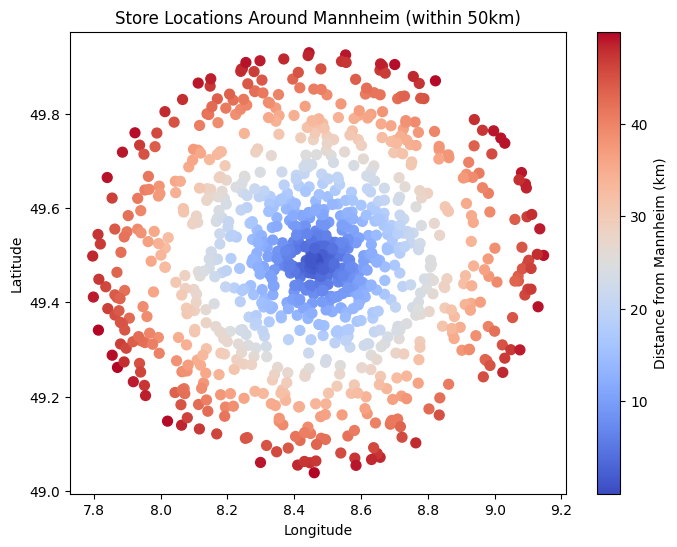

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for store locations around Mannheim
plt.figure(figsize=(8,6))
plt.scatter(fake_data['Store_Longitude'], fake_data['Store_Latitude'], c=fake_data['Distance_From_Mannheim'], cmap='coolwarm', s=50)
plt.colorbar(label='Distance from Mannheim (km)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Store Locations Around Mannheim (within 50km)')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define your feature columns (including the new ones)
feature_cols = ['Price', 'Available', 'Distance_From_Mannheim', 'Historical_Sales']

# Prepare data
X = fake_data[feature_cols]
y = fake_data['ExpiresAt'].apply(lambda x: (x - datetime.now()).days)  # Target: Days until expiry

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 13084.783984499998
R² Score: -0.15657053792227993


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = fake_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'Sunflower Oil'

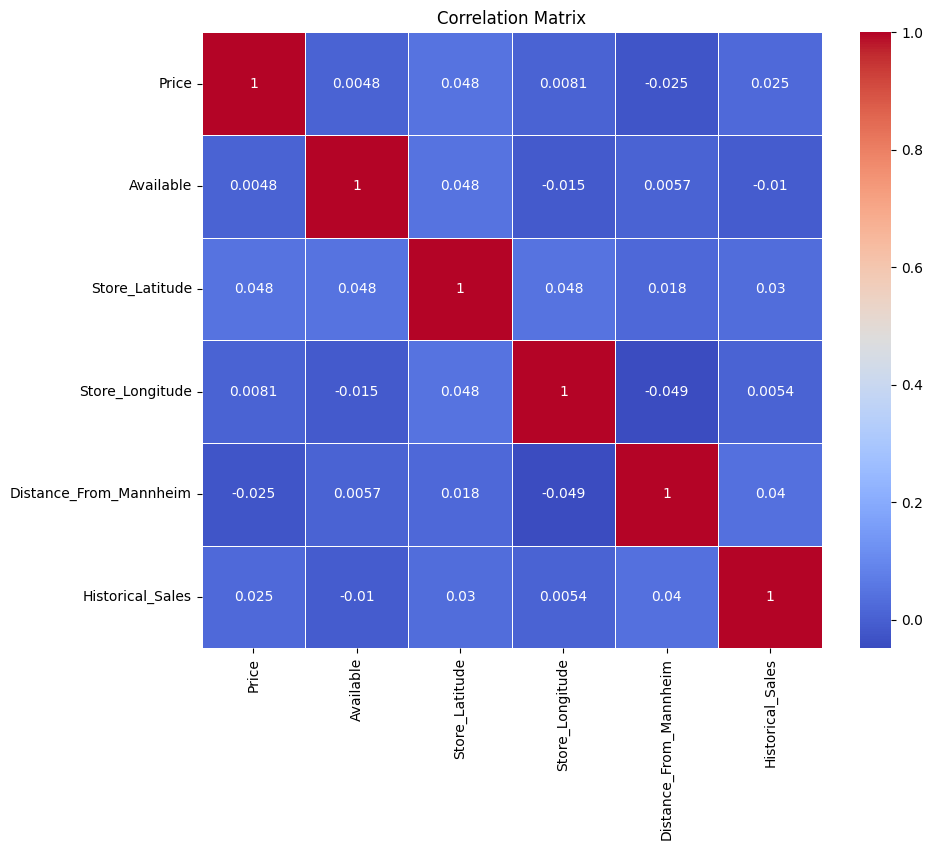

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = fake_data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Create a priority feature based on 'days_until_expiry'
def assign_priority(days):
    if days <= 3:
        return 1  # Highest priority
    elif days <= 8:
        return 2
    elif days <= 14:
        return 3
    elif days <= 28:
        return 4
    else:
        return 5  # Lowest priority

# Ensure days_until_expiry is present
fake_data['days_until_expiry'] = fake_data['ExpiresAt'].apply(lambda x: (x - datetime.now()).days)

# Create priority based on days_until_expiry
fake_data['Priority'] = fake_data['days_until_expiry'].apply(assign_priority)


In [ ]:
fake_data['Priority'] = pd.to_numeric(fake_data['Priority'])


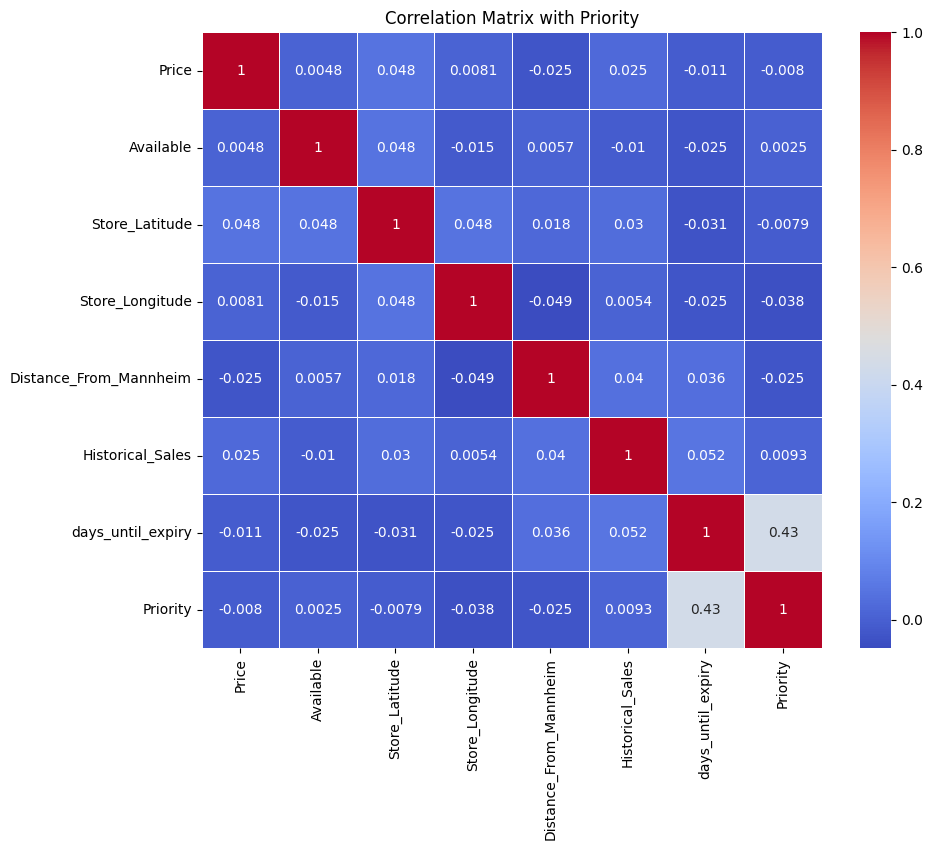

In [ ]:
# Add priority to the numeric columns
numeric_columns = fake_data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix with priority included
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix with Priority')
plt.show()


In [ ]:
# Ensure ExpiresAt is in datetime format
fake_data['ExpiresAt'] = pd.to_datetime(fake_data['ExpiresAt'])

# Add time-based features
fake_data['day_of_week'] = fake_data['ExpiresAt'].dt.dayofweek  # Monday=0, Sunday=6
fake_data['month'] = fake_data['ExpiresAt'].dt.month
fake_data['year'] = fake_data['ExpiresAt'].dt.year
fake_data['is_weekend'] = fake_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for weekend, 0 for weekday

# Season feature (Spring=1, Summer=2, Autumn=3, Winter=4)
def assign_season(month):
    if month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    elif month in [9, 10, 11]:
        return 3  # Autumn
    else:
        return 4  # Winter

fake_data['season'] = fake_data['month'].apply(assign_season)

# Display the updated dataset with time-based features
print(fake_data[['day_of_week', 'month', 'year', 'is_weekend', 'season']].head())


   day_of_week  month  year  is_weekend  season
0            2      9  2024           0       3
1            4      1  2025           0       4
2            4      9  2025           0       3
3            6      8  2025           1       2
4            2      2  2025           0       4


In [ ]:
# Assign shelf life based on product categories
def assign_shelf_life(product):
    if product in ['Milk', 'Cheese', 'Chicken']:  # Perishables
        return 7  # 7 days
    elif product in ['Olive Oil', 'Sunflower Oil', 'Pasta', 'Rice']:  # Non-perishables
        return 365  # 1 year
    else:
        return 30  # Default shelf life for other products

# Add shelf life column
fake_data['shelf_life_in_days'] = fake_data['Product'].apply(assign_shelf_life)

# Display the dataset with shelf life
print(fake_data[['Product', 'shelf_life_in_days']].head())


         Product  shelf_life_in_days
0  Sunflower Oil                 365
1         Lemons                  30
2           Rice                 365
3        Cookies                  30
4        Carrots                  30


In [ ]:
# Dummy weather data (you can replace this with actual data from APIs like OpenWeatherMap)
def generate_weather_data():
    temperature = random.uniform(10, 30)  # Temperature in Celsius
    precipitation = random.uniform(0, 10)  # Precipitation in mm
    return temperature, precipitation

# Add weather data to the dataset
fake_data['temperature'], fake_data['precipitation'] = zip(*[generate_weather_data() for _ in range(len(fake_data))])

# Display dataset with weather data
print(fake_data[['Store_Latitude', 'Store_Longitude', 'temperature', 'precipitation']].head())


   Store_Latitude  Store_Longitude  temperature  precipitation
0       49.733586         7.937481    11.370460       5.710775
1       49.312934         8.671997    10.516431       6.362981
2       49.306178         8.316345    29.516115       2.027532
3       49.481751         9.098352    28.617324       5.305432
4       49.228925         8.128894    11.757282       5.920524


In [ ]:
# Define the feature columns to include the new features
feature_cols = ['Price', 'Available', 'Distance_From_Mannheim', 'Historical_Sales', 
                'day_of_week', 'is_weekend', 'season', 'shelf_life_in_days', 'temperature', 'precipitation']

# Prepare the data
X = fake_data[feature_cols]
y = fake_data['days_until_expiry']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (Random Forest for example)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 2090.3333835
R² Score: 0.8152343967882572
